In [1]:
# Import libraries

import math
import numpy as np
import scipy.stats

from matplotlib import pyplot as plt


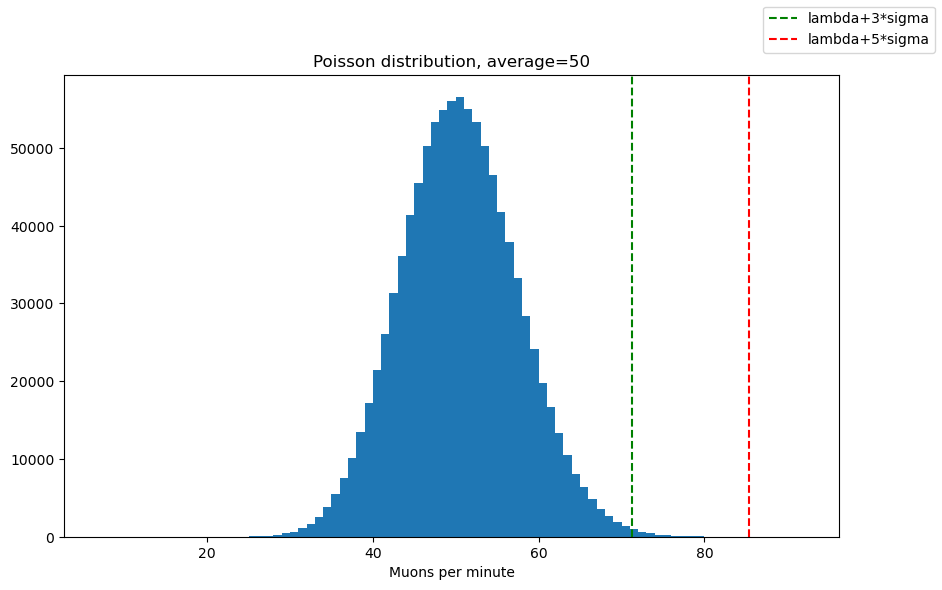

In [2]:
average_count: int = 50 # counts/min
sigma: float = math.sqrt(average_count)
simulation_time: int = 1000000 # minutes

# Simulate 1000 minutes of data
data = np.random.poisson(average_count, simulation_time)
lower_limit: int = int(average_count-6*sigma)
upper_limit: int = int(average_count+6*sigma)
nbins: int = upper_limit - lower_limit

fig = plt.figure(figsize=(10, 6))
ax = plt.hist(data, nbins, (lower_limit, upper_limit))
plt.title(f'Poisson distribution, average={average_count}')
plt.xlabel('Muons per minute')
plt.axvline(x=(average_count+3*sigma), color='green', linestyle='--', label='lambda+3*sigma')
plt.axvline(x=(average_count+5*sigma), color='red', linestyle='--', label='lambda+5*sigma')
fig.legend()

plt.show()

In [3]:
# Probability of count being part of the background
p_value_3sigma: float = scipy.stats.poisson.sf(int(average_count+3*sigma) -1, average_count)
p_value_5sigma: float = scipy.stats.poisson.sf(int(average_count+5*sigma) -1, average_count)
print(f'Probability of finding count >= {int(average_count+3*sigma)}: {p_value_3sigma:.2e}')
print(f'Probability of finding count >= {int(average_count+5*sigma)}: {p_value_5sigma:.2e}')
# p_value: float = scipy.stats.poisson.sf(62 -1, average_count)
# print(f'p-value with count 62: {p_value:.3f}')

Probability of finding count >= 71: 2.97e-03
Probability of finding count >= 85: 4.14e-06


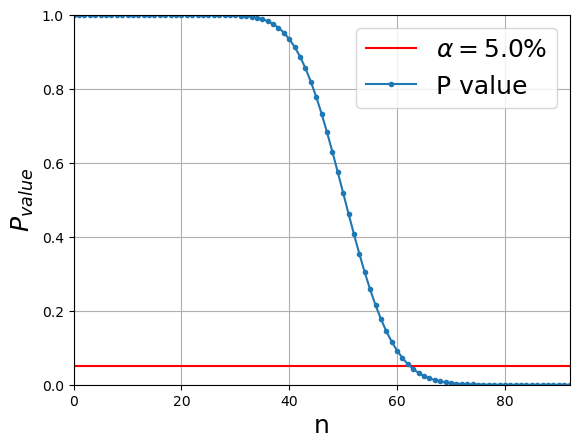

In [4]:
def Poisson(n, mean):
    return (mean**n)*(np.exp(-mean))/math.factorial(n)

def SumUntil(stop, mean):
    s = 0
    for i in range(0, stop):
        s += Poisson(i, mean)
    return s

n = np.linspace(0, upper_limit, upper_limit+1)
P_value = []
for element in n:
    P_value.append(1 - SumUntil(int(element), average_count))

alpha = 0.05

plt.errorbar(n, P_value, fmt='.-', label='P value')
plt.xlabel('n', fontsize = 18)
plt.ylabel(r'$P_{value}$', fontsize = 18)
plt.axhline(y=alpha, color='r', linestyle='-', label=rf'$\alpha={alpha*100}\%$')
plt.ylim(0,1)
plt.xlim(0,upper_limit)
plt.grid()
plt.legend(fontsize=18)

In [12]:
threshold: int = np.where(np.array(P_value) <= alpha)[0][0]
z: float = (threshold - average_count) / sigma

print("=" * 40)
print("            SIGNAL THRESHOLD")
print("=" * 40)
print(f" Configuration:")
print(f"  - Background Rate    : {average_count} counts/min")
print(f"  - Significance Level : {alpha:.1%} (95% Confidence)")
print("-" * 40)
print(f" Results:")
print(f"  - Detection Threshold: >= {threshold} counts/min")
print(f"  - Normalized Distance: {z:.2f} σ")
print("=" * 40)


            SIGNAL THRESHOLD
 Configuration:
  - Background Rate    : 50 counts/min
  - Significance Level : 5.0% (95% Confidence)
----------------------------------------
 Results:
  - Detection Threshold: >= 63 counts/min
  - Normalized Distance: 1.84 σ
